# Pruebas de segmentación con el Catálogo Morfológico de Nebulosas Planetarias del IAC
En este documento vamos a probar las técnicas comentadas por Diego Cantorna en el documento de astrogestem (disponible en la carpeta astrosegstem de este mismo repositorio).

## 0. Preparación del entorno
Para empezar, lo primero que vamos a hacer va a ser preparar el entorno en el que se van a hacer las ejecuciones, de donde el programa tiene que cargar las imágenes y las máscaras de las nebulosas planetarias y donde va a guardar los resultados obtenidos.

In [1]:
import os

print("Vamos a cambiar el directorio de trabajo")

# Indicamos la ruta del directorio de trabajo
route = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation"
os.chdir(route)

current_directory = os.getcwd()
print("\nEl directorio actual es:", current_directory)

# Listamos el contenido del directorio
files = os.listdir(current_directory)
print("\nContenido del directorio actual:")
for file in files:
    print("\t",file)


Vamos a cambiar el directorio de trabajo

El directorio actual es: C:\Users\Lucan\OneDrive - Universidade da Coruña\Escritorio\4_GCEID\TFG\test\PNe_segmentation

Contenido del directorio actual:
	 data
	 masks
	 segmentation_test.ipynb


## 1. Carga de las imágenes junto a sus máscaras


Vamos a hacer una prueba de como cargaríamos una máscara y contorno junto con la imagen a la que pertenece. Pero antes vamos a realizar ciertas operaciones para tener almacenados y clasificados todos los archivos que tenemos disponibles.

In [2]:
# Listamos el contenido del directorio de las máscaras
masks_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\masks"
masksFiles = os.listdir(masks_directory)
masks_files = [file for file in masksFiles if file.endswith(".png")]

data_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\data"
dataFiles = os.listdir(data_directory)
data_files = [file for file in dataFiles if file.endswith(".fits")]

Creamos un diccionario en el que las claves sean el nombre identificador de la nebulosa y el valor sea una lista con las máscaras y contornos disponibles de esa nebulosa.

In [3]:
masks_dict = {}

for mask_file in masks_files:
    nebula_name = mask_file.split("_")[:-1]
    nebula_name = "_".join(nebula_name)
    if masks_dict.get(nebula_name) is None:
        masks_dict[nebula_name] = [mask_file]
    else: 
        masks_dict[nebula_name].append(mask_file)

masks_dict


{'A13': ['A13_contour.png'],
 'A14': ['A14_contour.png', 'A14_mask.png'],
 'A16': ['A16_contour.png'],
 'A18': ['A18_contour.png', 'A18_mask.png'],
 'A19': ['A19_contour.png', 'A19_mask.png'],
 'A24': ['A24_contour.png'],
 'A2': ['A2_contour.png', 'A2_mask.png'],
 'A30': ['A30_contour.png', 'A30_mask.png'],
 'A39': ['A39_contour.png', 'A39_mask.png'],
 'A3': ['A3_contour.png'],
 'A43': ['A43_contour.png', 'A43_mask.png'],
 'A46': ['A46_contour.png', 'A46_mask.png'],
 'A4': ['A4_contour.png'],
 'A50': ['A50_contour.png', 'A50_mask.png'],
 'A52': ['A52_contour.png', 'A52_mask.png'],
 'A54': ['A54_contour.png', 'A54_mask.png'],
 'A57': ['A57_contour.png', 'A57_mask.png'],
 'A58': ['A58_contour.png', 'A58_mask.png'],
 'A63': ['A63_contour.png', 'A63_mask.png'],
 'A68': ['A68_contour.png', 'A68_mask.png'],
 'A70': ['A70_contour.png', 'A70_mask.png'],
 'A71': ['A71_contour.png', 'A71_mask.png'],
 'A72': ['A72_contour.png', 'A72_mask.png'],
 'A73': ['A73_contour.png'],
 'A75': ['A75_contour.p

Comprobamos que todas las máscaras/contornos disponibles se han asignado a una nebulosa

In [4]:
masks_dict_count = sum(len(files) for files in masks_dict.values())
masks_files_count = len(masks_files)

if masks_dict_count == masks_files_count:
    print("The number of files in masks_dict is the same as the number of files in masks_files.")
else:
    print("The number of files in masks_dict is different from the number of files in masks_files.")
    
    files_not_in_data_dict = set(masks_files) - set(sum(masks_dict.values(), []))
    print("Files not in data_dict:", files_not_in_data_dict)


The number of files in masks_dict is the same as the number of files in masks_files.


Ahora creamos un diccionario similar al anterior, con las mismas claves, pero en los valores se van a guardar los archivos fits que se refieren a la nebulosa indicada.

In [5]:
import re
data_dict = {}

for nebula in masks_dict.keys():
    patron = re.compile(r'(?i)' + nebula + r'\D+.*')
    data_dict[nebula] = [file for file in data_files if patron.match(file)]

data_dict

{'A13': ['A13hcg.fits', 'A13o3cg.fits'],
 'A14': ['A14hac.fits',
  'A14hacee.fits',
  'A14hc.fits',
  'A14n2c.fits',
  'A14n2cee.fits',
  'A14ocg.fits'],
 'A16': ['A16_Hacc.fits', 'A16_occ.fits'],
 'A18': ['A18hc.fits', 'A18ogc.fits'],
 'A19': ['A19hg.fits', 'A19ocg.fits'],
 'A24': ['A24hgc.fits', 'A24ocg.fits'],
 'A2': ['A2hc.fits', 'A2oc.fits'],
 'A30': ['A30hc.fits', 'A30oc.fits'],
 'A39': ['A39hgc.fits', 'A39ocgc.fits', 'A39ocgce.fits'],
 'A3': ['A3hcg.fits', 'A3o3cg.fits'],
 'A43': ['A43hg.fits', 'A43og.fits'],
 'A46': ['A46hgc.fits', 'A46ogc.fits'],
 'A4': ['A4hc.fits', 'A4oc.fits'],
 'A50': ['A50h.fits', 'A50oc.fits'],
 'A52': ['A52hac.fits', 'A52o3c.fits'],
 'A54': ['A54hacg.fits', 'A54o3gc.fits'],
 'A57': ['A57Ha.fits',
  'A57Hac.fits',
  'A57Hace.fits',
  'A57o3.fits',
  'A57o3c.fits',
  'A57o3ce.fits'],
 'A58': ['A58blue.fits', 'A58hace.fits', 'A58n2ce.fits'],
 'A63': ['A63hac.fits', 'A63o3_badcg.fits'],
 'A68': ['A68hac.fits', 'A68o3c.fits'],
 'A70': ['A70hc.fits', 'A70oc.f

Comprobamos que todos los archivos fits disponibles se han asignado a una nebulosa

In [6]:
data_dict_count = sum(len(files) for files in data_dict.values())
data_files_count = len(data_files)

if data_dict_count == data_files_count:
    print("The number of files in data_dict is the same as the number of files in data_files.")
else:
    print("The number of files in data_dict is different from the number of files in data_files.")
    
    files_not_in_data_dict = set(data_files) - set(sum(data_dict.values(), []))
    print("Files not in data_dict:", files_not_in_data_dict)


The number of files in data_dict is the same as the number of files in data_files.


En este punto tenemos dos diccionarios con los cuales cargar los archivos facilmente y clasificados por el nombre identificador de la nebulosa.
Ahora sí, vamos a cargar todos los canales disponibles de una nebulosa junto a su contorno y máscara (si tiene).

In [7]:
from astropy.io import fits
import imageio as io
import numpy as np
def cargar_canales_nebulosa(nebula, data_dict, masks_dict, data_directory, masks_directory):
    data_files = data_dict[nebula]
    masks_files = masks_dict[nebula]
    data = []
    masks = []
    for file in data_files:
        image = fits.getdata("data\\"+file)
        image = np.flip(image, axis=0)
        data.append(image)
    for file in masks_files:
        image = io.imread("masks\\"+file)
        if image.shape[2] > 1:
            image = image[:,:,0]
        masks.append(image)
    return data, masks

In [22]:
canales, mascaras = cargar_canales_nebulosa("A2", data_dict, masks_dict, data_directory, masks_directory)

C:\Users\Lucan\AppData\Local\Temp\ipykernel_3232\2345613571.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("masks\\"+file)


Vamos a analizar como son las imagenes obtenidas, sus valores mínimos y máximos, sus dimensiones, etc.

In [23]:
def imprimir_info_imagen(image, title):
    min_value = np.min(image)
    max_value = np.max(image)
    dimensions = image.shape
    null_values = np.isnan(image).sum()
    print(title)
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print(f"Null values: {null_values}")
    print(f"Dimensions: {dimensions}\n")

In [24]:
# Analyze canales' images
for i, channel in enumerate(canales):
    imprimir_info_imagen(channel, f"Channel {i+1}:")

# Analyze mascaras' images
for i, mask in enumerate(mascaras):
    imprimir_info_imagen(mask, f"Mask {i+1}:")

Channel 1:
Minimum value: 69.32587432861328
Maximum value: 977.3033447265625
Null values: 0
Dimensions: (490, 490)

Channel 2:
Minimum value: -31.4918155670166
Maximum value: 100.20258331298828
Null values: 0
Dimensions: (490, 490)

Mask 1:
Minimum value: 0
Maximum value: 255
Null values: 0
Dimensions: (490, 490)

Mask 2:
Minimum value: 0
Maximum value: 255
Null values: 0
Dimensions: (490, 490)



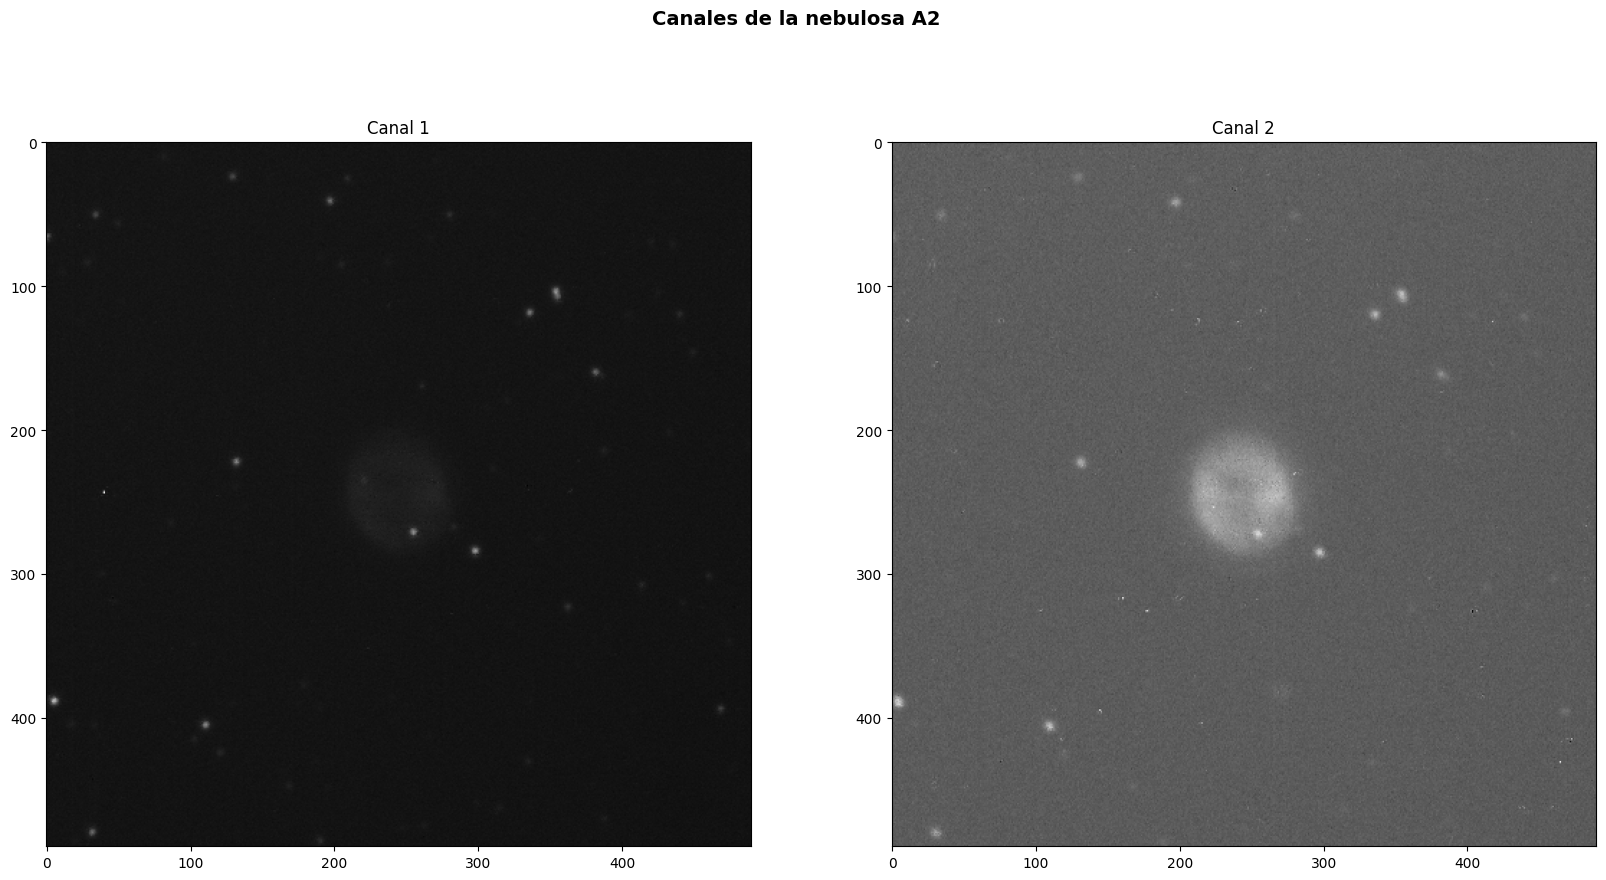

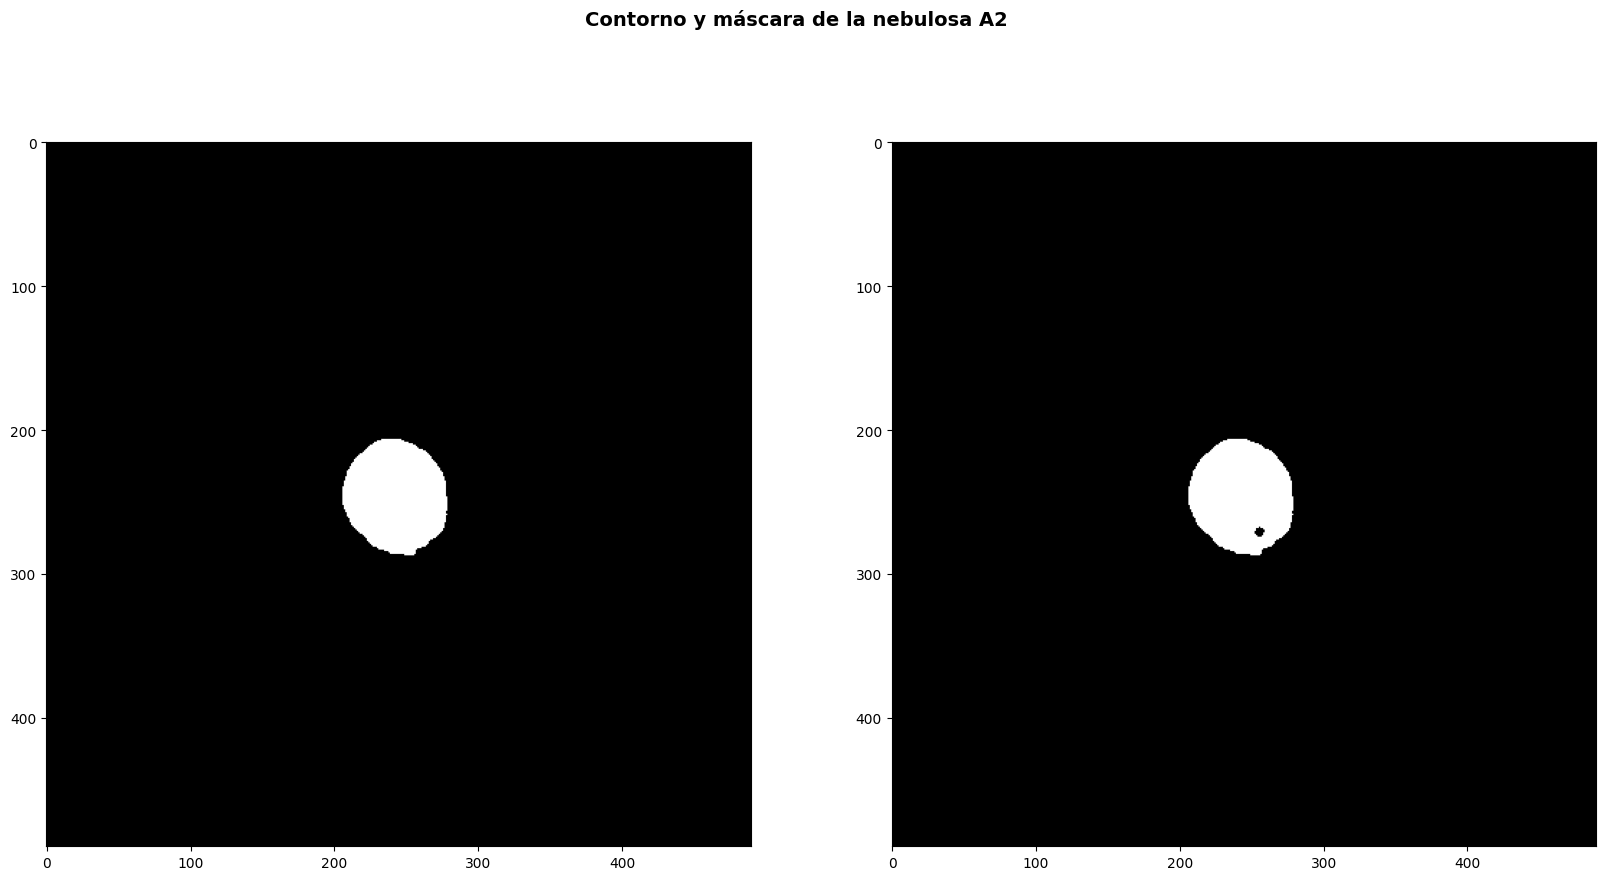

In [25]:
import matplotlib.pyplot as plt
num_images = len(canales)

fig, ax = plt.subplots(1, num_images, figsize=(10*num_images, 10))
fig.suptitle(f"Canales de la nebulosa A2", fontweight = 'bold', fontsize = 14)

for i in range(num_images):
    ax[i].imshow(canales[i], cmap = "gray")
    ax[i].set_title(f"Canal {i+1}")

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle(f"Contorno y máscara de la nebulosa A2", fontweight = 'bold', fontsize = 14)

ax[0].imshow(mascaras[0], cmap = "gray")
ax[1].imshow(mascaras[1], cmap = "gray")